In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

**Datasets path**

In [2]:
cat_dog_dataset='/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset'


**Take the Train path and Test path**



In [3]:
Train_data_path='/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set'

In [4]:
Test_data_path='/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set'

**Import the path file**

In [5]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/*')

['/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs',
 '/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/cats']

In [6]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set*')

['/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set']

Set the fixed size so while modeling images its easy to understand

In [7]:
image_height,image_width=100,100

**Import the package**

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1.  ImageDataGenerator is used for getting the input of the original data and  it makes the transformation of this data on a random basis and gives the output resultant
2.   rescale-scaling the image 0-1 range
3. Shearing deals with changing the shape and size of the 2D object along x-axis and y-axis




In [9]:
train_data_preprocess=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

In [10]:
test_data_preprocess=ImageDataGenerator(rescale=1./255)

**take the lables**

In [11]:
labeles=['cats','dogs']

**NOW assign the Train data and Test data for architecture**

In [12]:
Train_data=train_data_preprocess.flow_from_directory(Train_data_path,target_size=(image_height,image_width),classes=labeles,class_mode='binary',batch_size=32)

Found 8005 images belonging to 2 classes.


In [13]:
Test_data=test_data_preprocess.flow_from_directory(Test_data_path,target_size=(image_height,image_width),classes=labeles,class_mode='binary',batch_size=32)

Found 2033 images belonging to 2 classes.


**Import the libaries**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,sigmoid

**Bulid the Architecture**

In [15]:
model=Sequential()# Inital steps for buliding the architecture
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(image_height,image_width,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten()) # one dimensional array
# 1D given to ANN
model.add(Dense(32,activation='relu'))# hidden layer 1
model.add(Dense(16,activation='relu'))# hidden layer 2
model.add(Dense(1,activation='sigmoid'))# Output layer


 **data has given to architecture**

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

**Training Begins**

In [18]:
model.fit(Train_data,epochs=10)

Epoch 1/10
251/251 [==============================] - 1315s 5s/step - loss: 0.6761 - Accuracy: 0.5768
Epoch 2/10
251/251 [==============================] - 49s 194ms/step - loss: 0.6334 - Accuracy: 0.6433
Epoch 3/10
251/251 [==============================] - 50s 199ms/step - loss: 0.5992 - Accuracy: 0.6823
Epoch 4/10
251/251 [==============================] - 48s 190ms/step - loss: 0.5640 - Accuracy: 0.7091
Epoch 5/10
251/251 [==============================] - 49s 194ms/step - loss: 0.5439 - Accuracy: 0.7223
Epoch 6/10
251/251 [==============================] - 48s 190ms/step - loss: 0.5104 - Accuracy: 0.7492
Epoch 7/10
251/251 [==============================] - 50s 199ms/step - loss: 0.4881 - Accuracy: 0.7628
Epoch 8/10
251/251 [==============================] - 46s 184ms/step - loss: 0.4649 - Accuracy: 0.7743
Epoch 9/10
251/251 [==============================] - 46s 184ms/step - loss: 0.4501 - Accuracy: 0.7886
Epoch 10/10
251/251 [==============================] - 47s 186ms/step - lo

**Training Accuracy and Loss**

In [19]:
Training_accuracy=model.history.history['Accuracy']
Training_accuracy

[0.5767645239830017,
 0.6433479189872742,
 0.6823235750198364,
 0.7090568542480469,
 0.7222985625267029,
 0.7491567730903625,
 0.7627732753753662,
 0.7742660641670227,
 0.7886320948600769,
 0.7913804054260254]

In [20]:
Training_loss=model.history.history['loss']
Training_loss

[0.676121711730957,
 0.6334264278411865,
 0.5992215275764465,
 0.5640302896499634,
 0.5438741445541382,
 0.5103947520256042,
 0.4880755841732025,
 0.4648702144622803,
 0.4501149356365204,
 0.4303708076477051]

**EDA FOR Model Validation**

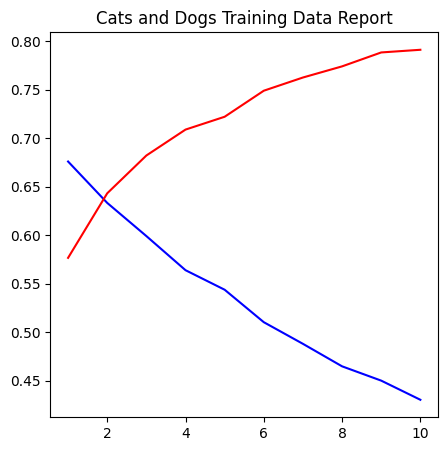

In [22]:
plt.figure(figsize = (5,5))
plt.plot(np.arange(1,11),Training_loss,color='b',label='accuracy')
plt.plot(np.arange(1,11),Training_accuracy,color='r',label='loss')
plt.title('Cats and Dogs Training Data Report')
plt.show()



- Since the training accuracy is 92 % with 8005 images we can say out own CNN model is really trained well.

If our Trained model is working well with test data then only we can say our model is working fine or else we can say there is an overfitting problem

# Lets take the cat or dog image and check it

[[[ 52  70  82]
  [ 52  70  82]
  [ 52  70  82]
  ...
  [ 57  78  97]
  [ 57  78  97]
  [ 59  80  99]]

 [[ 52  70  82]
  [ 52  70  82]
  [ 52  70  82]
  ...
  [ 57  78  97]
  [ 57  78  97]
  [ 59  80  99]]

 [[ 52  70  82]
  [ 52  70  82]
  [ 52  70  82]
  ...
  [ 58  79  98]
  [ 58  79  98]
  [ 59  80  99]]

 ...

 [[104 133 147]
  [106 135 149]
  [107 135 149]
  ...
  [137 103  91]
  [137 104  89]
  [138 105  90]]

 [[102 128 141]
  [107 130 144]
  [111 133 147]
  ...
  [135  99  85]
  [140 104  88]
  [142 109  92]]

 [[101 125 137]
  [105 127 140]
  [112 129 145]
  ...
  [135  99  83]
  [141 105  89]
  [142 109  92]]]
(306, 337, 3)


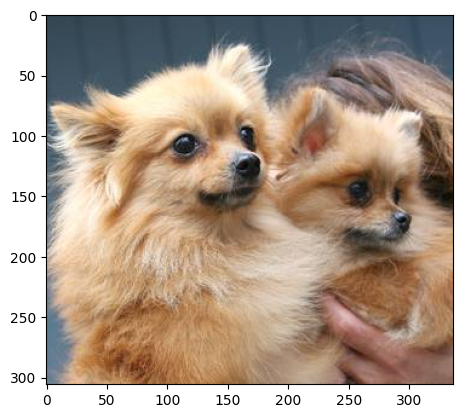

In [23]:
image=plt.imread('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs/dog.77.jpg')
print(image)
print(image.shape)
plt.imshow(image)

In [35]:
import cv2
import numpy as np
def prediction(path):
  image=cv2.imread(path)
  print('original image:',image.shape)
  image=cv2.resize(image,(100,100))# Take the size with same training data
  print(image.shape)
   # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image=np.array(image)/255.0
  # we need convert to cnn deep learning
  image=np.expand_dims(image,axis=0)
  # data given to Trained model
  result=model.predict(image)
  print(result)
  image_name=plt.imread(path)
  plt.imshow(image_name)
  if result[0][0]>0.5:
    print("this ia dog image")
  else:
    print("this is a cat")

original image: (306, 337, 3)
(100, 100, 3)
1/1 [==============================] - 0s 20ms/step
[[0.93733305]]
this ia dog image


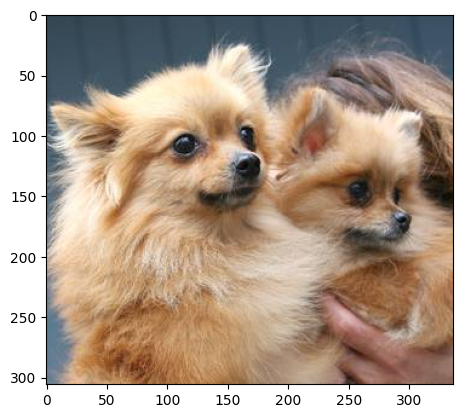

In [36]:
prediction('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs/dog.77.jpg')

original image: (375, 499, 3)
(100, 100, 3)
1/1 [==============================] - 0s 47ms/step
[[0.44924346]]
this is a cat


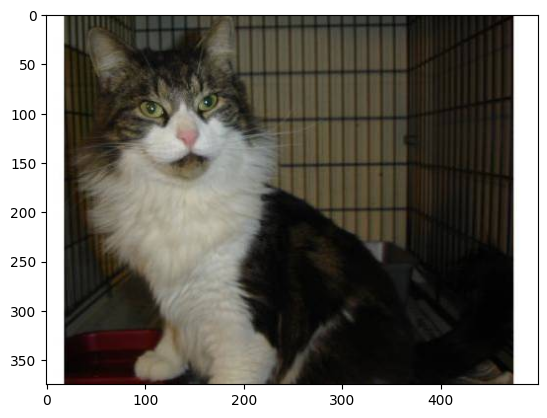

In [37]:
prediction('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/cats/cat.73.jpg')